# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

# 60 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [4]:
print(model.similarity('United_States', 'U.S.'))

0.73107743


## 62 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
print(model.most_similar('United_States', topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


## 63 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [6]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'],topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


## 64 アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("questions-words.txt")

In [15]:
df

,: capital-common-countries
0,Athens Greece Baghdad Iraq
1,Athens Greece Bangkok Thailand
2,Athens Greece Beijing China
3,Athens Greece Berlin Germany
4,Athens Greece Bern Switzerland
...,...
19552,write writes talk talks
19553,write writes think thinks
19554,write writes vanish vanishes
19555,write writes walk walks


In [136]:
df["1"] = df[': capital-common-countries'].str.split(expand=True)[0]
df["2"] = df[': capital-common-countries'].str.split(expand=True)[1]
df["3"] = df[': capital-common-countries'].str.split(expand=True)[2]
df["4"] = df[': capital-common-countries'].str.split(expand=True)[3]

In [105]:
df

,: capital-common-countries,1,2,3,4
0,Athens Greece Baghdad Iraq,Athens,Greece,Baghdad,Iraq
1,Athens Greece Bangkok Thailand,Athens,Greece,Bangkok,Thailand
2,Athens Greece Beijing China,Athens,Greece,Beijing,China
3,Athens Greece Berlin Germany,Athens,Greece,Berlin,Germany
4,Athens Greece Bern Switzerland,Athens,Greece,Bern,Switzerland
...,...,...,...,...,...
19552,write writes talk talks,write,writes,talk,talks
19553,write writes think thinks,write,writes,think,thinks
19554,write writes vanish vanishes,write,writes,vanish,vanishes
19555,write writes walk walks,write,writes,walk,walks


In [76]:
print(df[df['3'].isnull()])

          : capital-common-countries  1                            2     3  \
506                  : capital-world  :                capital-world  None   
5031                      : currency  :                     currency  None   
5898                 : city-in-state  :                city-in-state  None   
8366                        : family  :                       family  None   
8873     : gram1-adjective-to-adverb  :    gram1-adjective-to-adverb  None   
9866                : gram2-opposite  :               gram2-opposite  None   
10679            : gram3-comparative  :            gram3-comparative  None   
12012            : gram4-superlative  :            gram4-superlative  None   
13135     : gram5-present-participle  :     gram5-present-participle  None   
14192  : gram6-nationality-adjective  :  gram6-nationality-adjective  None   
15792             : gram7-past-tense  :             gram7-past-tense  None   
17353                 : gram8-plural  :                 gram8-pl

In [75]:
df.isnull().sum()

: capital-common-countries     0
1                              0
2                              0
3                             13
4                             13
dtype: int64

In [4]:
def calc_name_score(row):
    if row.isnull().any():
        return
    result = model.most_similar(positive=[row['2'], row['3']], negative=[row['1']], topn=1)
    name, score = result[0][0], result[0][1]
    t+=1
    print(t)
    return name, score

In [5]:
df[['name', 'score']] = df.apply(calc_name_score, axis=1, result_type="expand")

NameError: name 'model' is not defined

In [140]:
df[['1', '2', '3', '4', 'name', 'score']].to_csv("result.txt", sep="\t", index=False)

In [138]:
df[-10:]

,: capital-common-countries,1,2,3,4,name,score
19547,write writes sing sings,write,writes,sing,sings,sings,0.720717
19548,write writes sit sits,write,writes,sit,sits,sits,0.554350
19549,write writes slow slows,write,writes,slow,slows,slows,0.509294
19550,write writes speak speaks,write,writes,speak,speaks,speaks,0.654322
19551,write writes swim swims,write,writes,swim,swims,swims,0.664338
19552,write writes talk talks,write,writes,talk,talks,talked,0.544719
19553,write writes think thinks,write,writes,think,thinks,thinks,0.617773
19554,write writes vanish vanishes,write,writes,vanish,vanishes,disappear,0.600271
19555,write writes walk walks,write,writes,walk,walks,walks,0.553434
19556,write writes work works,write,writes,work,works,works,0.538761


# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．
先ほど出力したファイルを読み込み、適当なカラム同士を比較します。

In [15]:
with open('./result.txt', 'r') as f:
    lines = f.readlines()
    sem_total, sem_correct = 0,0
    syn_total, syn_correct = 0,0
    task_type = None
    for line in lines:
        line = line.split()
        if len(line) != 6:
            if not line[1].startswith('gram'):    
                task_type = 'sem'
            else:
                task_type = 'syn'
        else:
            if task_type == 'sem':
                sem_total += 1
                if line[3] == line[4]:
                    sem_correct += 1
            elif task_type == 'syn':
                syn_total += 1
                if line[3] == line[4]:
                    syn_correct += 1
    
print(f'意味的アナロジー：{sem_correct/sem_total}')
print(f'文法的アナロジー：{syn_correct/syn_total}')             

意味的アナロジー：0.7308602999210734
文法的アナロジー：0.7400468384074942


# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [1]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [2]:
import pandas as pd

In [3]:
def calc_similarity(row):
    w1,w2 = row[0],row[1]
    return model.similarity(w1,w2)

In [39]:
df = pd.read_csv('./combined.csv', sep=',')
df['model_score'] = df.apply(calc_similarity, axis=1, result_type="expand")

In [47]:
print(df[['Human (mean)', 'model_score']].corr(method='spearman'))

              Human (mean)  model_score
Human (mean)      1.000000     0.700017
model_score       0.700017     1.000000


# 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [5]:
countries = set()
with open('./questions-words.txt', 'r') as f:
    lines = f.readlines()
    target = ['capital-common-countries','capital-world']

    for line in lines:
        line = line.split()
        if len(line) != 4:
            if line[1] not in target:
                break
        else:
            countries.add(line[1])
            countries.add(line[3])
countries = list(countries)
print(len(countries))

116


In [6]:
country_vec = [model[country] for country in countries]

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

In [8]:
pred = kmeans.fit_predict(country_vec)

C:\Users\shiny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
for country, cluster in zip(countries,pred):
    print(f'country: {country}, class: {cluster}')

country: Serbia, class: 3
country: Iraq, class: 4
country: Eritrea, class: 4
country: Syria, class: 4
country: Ukraine, class: 1
country: Nicaragua, class: 0
country: Sweden, class: 3
country: Mozambique, class: 2
country: Turkey, class: 3
country: Rwanda, class: 2
country: Fiji, class: 0
country: Ghana, class: 2
country: Angola, class: 2
country: Zimbabwe, class: 2
country: Greece, class: 3
country: Belize, class: 0
country: Indonesia, class: 0
country: Lithuania, class: 3
country: Kyrgyzstan, class: 1
country: Honduras, class: 0
country: Dominica, class: 0
country: Spain, class: 3
country: Latvia, class: 3
country: Switzerland, class: 3
country: Armenia, class: 1
country: Zambia, class: 2
country: Denmark, class: 3
country: Guyana, class: 0
country: Italy, class: 3
country: Afghanistan, class: 4
country: Turkmenistan, class: 1
country: Tunisia, class: 4
country: Bahamas, class: 0
country: Kenya, class: 2
country: Qatar, class: 4
country: Moldova, class: 1
country: Bhutan, class: 1
co

In [29]:
result = list(zip(countries,pred))
sorted_data = sorted(result, key=lambda x: x[1])

In [30]:
for data in sorted_data:
    print(data[0], data[1])

Iran 0
Qatar 0
Algeria 0
Spain 0
Oman 0
Libya 0
Bahrain 0
Turkey 0
Portugal 0
Iraq 0
Malta 0
Egypt 0
France 0
Greece 0
Morocco 0
Jordan 0
Tunisia 0
Lebanon 0
Syria 0
Ireland 0
Cyprus 0
Mozambique 1
Botswana 1
Gambia 1
Gabon 1
Eritrea 1
Sudan 1
Liberia 1
Senegal 1
Burundi 1
Namibia 1
Mali 1
Somalia 1
Mauritania 1
Guinea 1
Uganda 1
Rwanda 1
Malawi 1
Zambia 1
Madagascar 1
Niger 1
Zimbabwe 1
Angola 1
Ghana 1
Kenya 1
Nigeria 1
Romania 2
Albania 2
Slovenia 2
Macedonia 2
Hungary 2
Denmark 2
Finland 2
Norway 2
Uruguay 2
Serbia 2
Italy 2
Croatia 2
Switzerland 2
Germany 2
Montenegro 2
Poland 2
Sweden 2
Belgium 2
Austria 2
Liechtenstein 2
Slovakia 2
Ukraine 3
Estonia 3
Uzbekistan 3
Azerbaijan 3
Bulgaria 3
Latvia 3
Tajikistan 3
Turkmenistan 3
Kazakhstan 3
Kyrgyzstan 3
Belarus 3
Russia 3
Armenia 3
Georgia 3
Moldova 3
Lithuania 3
Vietnam 4
Greenland 4
Thailand 4
Bhutan 4
Bahamas 4
Ecuador 4
Peru 4
Pakistan 4
Australia 4
Afghanistan 4
Nicaragua 4
Chile 4
China 4
Laos 4
Bangladesh 4
Venezuela 4
Indone

# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

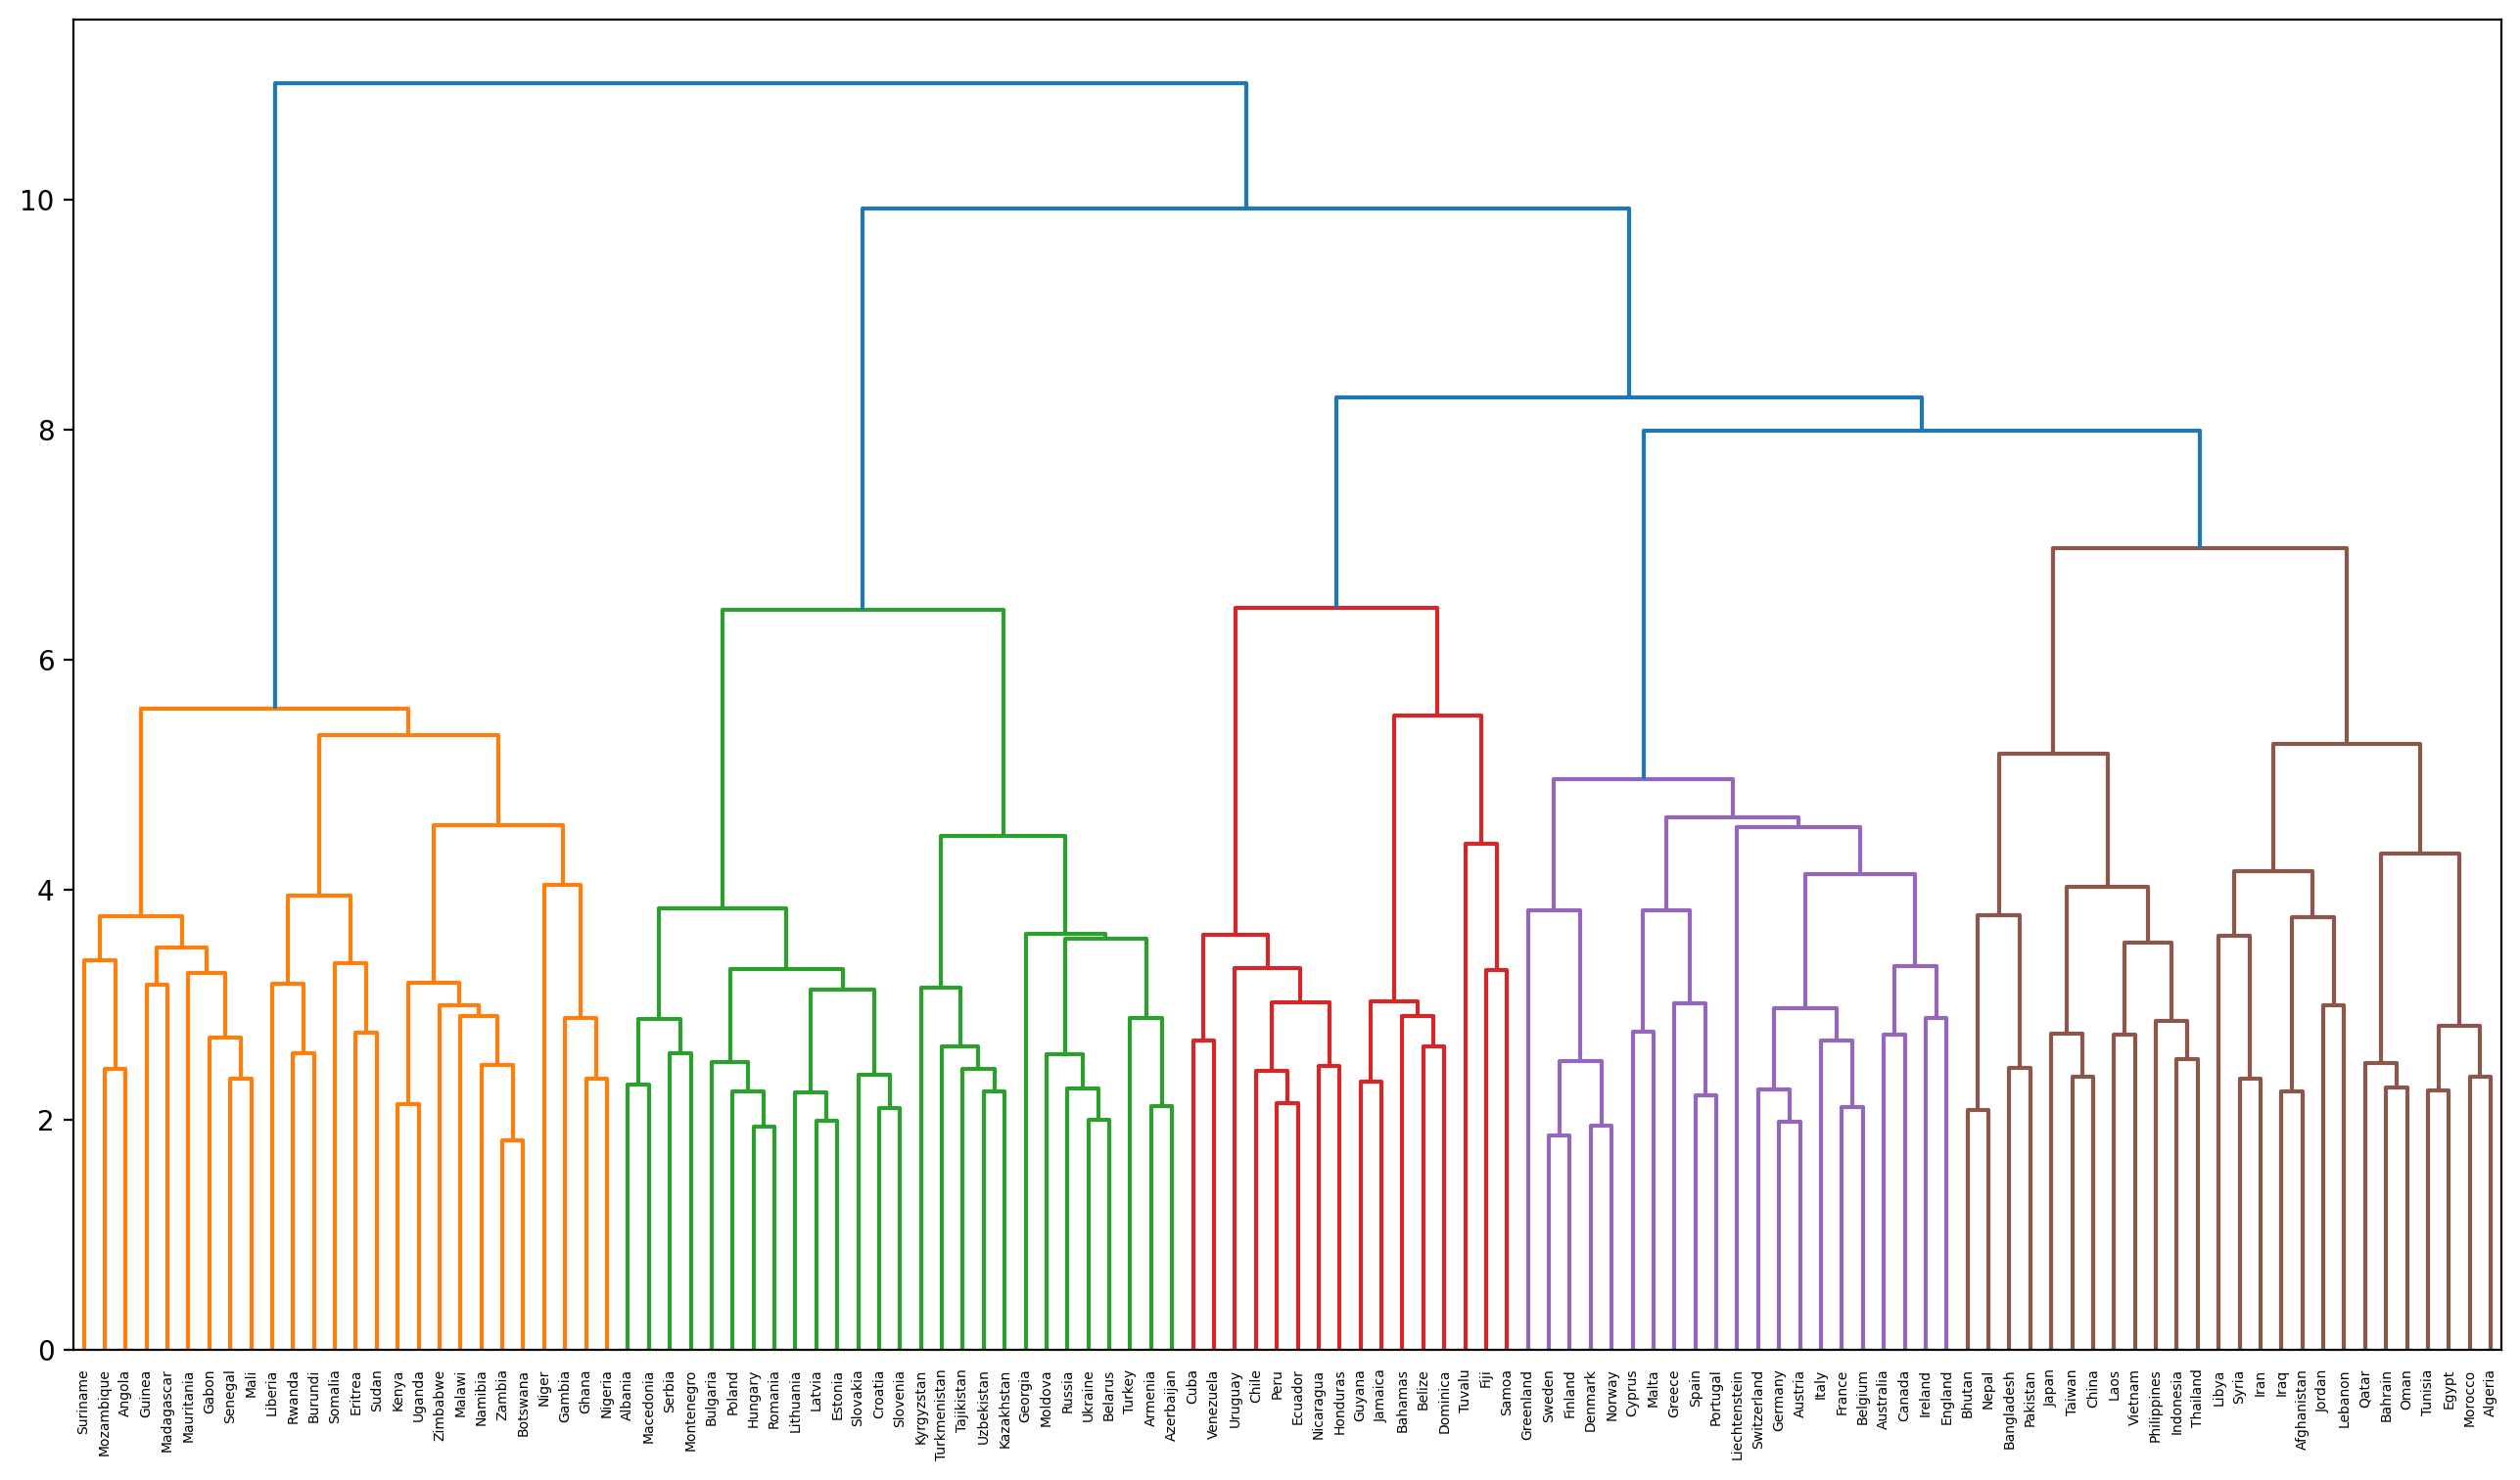

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
 
linkage_result = linkage(country_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries)
plt.show()

# 69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [13]:
from sklearn.manifold import TSNE
import pandas as pd

In [15]:
tsne = TSNE(n_components=2, random_state = 42)
emb = tsne.fit_transform(pd.DataFrame(country_vec))

In [16]:
df = pd.DataFrame(emb, columns=['vec1', 'vec2'])
print(df)

         vec1      vec2
0   -6.036703 -2.952968
1    3.793320 -6.302176
2    8.145866 -0.798827
3    5.212216 -4.691840
4   -9.256611 -4.855923
..        ...       ...
111 -6.807671 -1.814724
112 -5.754280  4.627939
113  5.632544 -2.832610
114 -5.394861  3.295492
115 -0.602680 -1.267192

[116 rows x 2 columns]


In [17]:
df_2 = pd.DataFrame(pred,columns=['class'])
print(df_2)

     class
0        3
1        4
2        4
3        4
4        1
..     ...
111      3
112      3
113      4
114      3
115      0

[116 rows x 1 columns]


In [18]:
df_3 = pd.concat([df,df_2],axis=1)
print(df_3)

         vec1      vec2  class
0   -6.036703 -2.952968      3
1    3.793320 -6.302176      4
2    8.145866 -0.798827      4
3    5.212216 -4.691840      4
4   -9.256611 -4.855923      1
..        ...       ...    ...
111 -6.807671 -1.814724      3
112 -5.754280  4.627939      3
113  5.632544 -2.832610      4
114 -5.394861  3.295492      3
115 -0.602680 -1.267192      0

[116 rows x 3 columns]


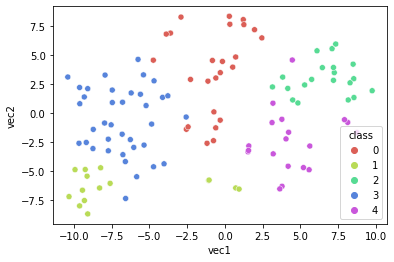

In [19]:
import seaborn as sns
sns.scatterplot(data=df_3, x='vec1', y='vec2', hue='class',
                palette=sns.color_palette('hls', 5))
plt.savefig('tsne.png')
plt.show()